In [4]:
import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
import os
import json
import glob
import pandas as pd
from collections import defaultdict

In [6]:
rpath = os.path.abspath('./..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils

In [53]:
# Visualize reply counts per user per channel
# Top and Bottom 10 users by reply count
def get_user_reply_counts(path):
    """Get reply counts for each user."""
    user_reply_counts = defaultdict(int)

    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                user_id = message.get('user')

                if user_id is not None:
                    user_reply_counts[user_id] += message.get('reply_count', 0)
    return user_reply_counts

    
def main():

    slack_data_path = './../dataset'  
    path = './../dataset/all-week1/'
    slack_loader = SlackDataLoader(slack_data_path)

    user_reply_counts = get_user_reply_counts(path)

    sorted_users = sorted(user_reply_counts.items(), key=lambda x: x[1], reverse=True)

    top_10_users = sorted_users[:10]
    bottom_10_users = sorted_users[-10:]

    print("Top 10 Users by Reply Count:")
    for user, count in top_10_users:
        print(f"{user}: {count} replies")

    print("\nBottom 10 Users by Reply Count:")
    for user, count in bottom_10_users:
        print(f"{user}: {count} replies")

if __name__ == "__main__":
    main()


Top 10 Users by Reply Count:
U03V6HMRPGQ: 80 replies
U03UJN29Y4C: 66 replies
U03UH397319: 51 replies
U03UUMM7Y8H: 37 replies
U03UJGRN5E0: 24 replies
U03U1FNPEUX: 21 replies
U03UVHCV6KB: 18 replies
U03U1FQKEMV: 12 replies
U03UUP56MDF: 12 replies
U03U9FWPNCE: 11 replies

Bottom 10 Users by Reply Count:
U03V1AM5TFA: 0 replies
U03TX2VN6H5: 0 replies
U03UFV7TUTV: 0 replies
U03UKGSDGSG: 0 replies
U03V8LHPDME: 0 replies
U03U1GHT39V: 0 replies
U03UG569P7U: 0 replies
U03UR2LQ4DR: 0 replies
U03UD68RQH3: 0 replies
U03U1HAG9TR: 0 replies


In [40]:
#Top 10 and Bottom 10 users by mention count 

from collections import defaultdict
import glob
import json

def get_user_message_counts(path):
    """Get message counts for each user."""
    user_message_counts = defaultdict(int)

    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                user_id = message.get('user')

                if user_id is not None:
                    user_message_counts[user_id] += 1
    return user_message_counts


def main():

    slack_data_path = './../dataset/' 
    path = './../dataset/all-week1/'
    user_message_counts = get_user_message_counts(path)

    sorted_users = sorted(user_message_counts.items(), key=lambda x: x[1], reverse=True)

    top_10_users = sorted_users[:10]
    bottom_10_users = sorted_users[-10:]

    print("Top 10 Users by Message Count:")
    for user, count in top_10_users:
        print(f"{user}: {count} messages")

    print("\nBottom 10 Users by Message Count:")
    for user, count in bottom_10_users:
        print(f"{user}: {count} messages")

if __name__ == "__main__":
    main()



Top 10 Users by Message Count:
U03V6HMRPGQ: 72 messages
U03UH397319: 56 messages
U03UVHCV6KB: 47 messages
U03UJN29Y4C: 43 messages
U03UUMM7Y8H: 38 messages
U03U1FNPEUX: 30 messages
U03UJGRN5E0: 30 messages
U03UKL27B0R: 25 messages
U03UG4Q7V42: 21 messages
U03UG32J3PC: 19 messages

Bottom 10 Users by Message Count:
U03UKGSDGSG: 2 messages
U03UD63A8PP: 2 messages
U03UUS0MZCZ: 2 messages
U03U4GULU3Y: 1 messages
U03TX2VN6H5: 1 messages
U03UJH1EQQL: 1 messages
U03UG569P7U: 1 messages
U03UR2LQ4DR: 1 messages
U03UG03HQ2F: 1 messages
U03U1HAG9TR: 1 messages


In [39]:
from collections import defaultdict
import glob
import json

def get_user_reaction_counts(path):
    """Get reaction counts for each user."""
    user_reaction_counts = defaultdict(int)

    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                user_id = message.get('user')
                reactions = message.get('reactions', [])

                if user_id is not None:
                    user_reaction_counts[user_id] += len(reactions)

    return user_reaction_counts

def main():

    slack_data_path = './../dataset/'  
    path = './../dataset/all-week1/'

    slack_loader = SlackDataLoader(slack_data_path)

    user_reaction_counts = get_user_reaction_counts(path)

    sorted_users = sorted(user_reaction_counts.items(), key=lambda x: x[1], reverse=True)

    top_10_users = sorted_users[:10]
    bottom_10_users = sorted_users[-10:]

    print("Top 10 Users by Reaction Count:")
    for user, count in top_10_users:
        print(f"{user}: {count} reactions")

    print("\nBottom 10 Users by Reaction Count:")
    for user, count in bottom_10_users:
        print(f"{user}: {count} reactions")

if __name__ == "__main__":
    main()


Top 10 Users by Reaction Count:
U03UJGRN5E0: 10 reactions
U03UVHCV6KB: 6 reactions
U03U1FNPEUX: 6 reactions
U03V6HMRPGQ: 6 reactions
U03UUR571A5: 6 reactions
U03UJN29Y4C: 5 reactions
U03UKL27B0R: 4 reactions
U03UH397319: 4 reactions
U03UG32J3PC: 4 reactions
U03T89ACUUW: 4 reactions

Bottom 10 Users by Reaction Count:
U03V8LHPDME: 0 reactions
U03UG1Z21JP: 0 reactions
U03UJH1EQQL: 0 reactions
U03UG569P7U: 0 reactions
U03UAKATQ22: 0 reactions
U03UR2LQ4DR: 0 reactions
U03UG03HQ2F: 0 reactions
U03UD63A8PP: 0 reactions
U03UD68RQH3: 0 reactions
U03UUS0MZCZ: 0 reactions


In [44]:
from collections import defaultdict
import glob
import json

def get_top_messages_by_replies(path, top_n=10):
    """Get top messages by replies."""
    message_replies = defaultdict(int)

    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                reply_count = message.get('reply_count', 0)
                message_text = message.get('text', '')
                message_replies[message_text] += reply_count

    sorted_messages = sorted(message_replies.items(), key=lambda x: x[1], reverse=True)
    top_messages = sorted_messages[:top_n]

    return top_messages

def main():

    slack_data_path = './../dataset/'  
    path = './../dataset/all-week1/'

    top_messages = get_top_messages_by_replies(path)
    print("Top 10 Messages by Replies:")
    for message, reply_count in top_messages:
        print(f"Message: {message}")
        print(f"Replies: {reply_count}\n")

if __name__ == "__main__":
    main()


Top 10 Messages by Replies:
Message: I need some one who understood task two to ask more questions??
Replies: 18

Message: <@U03UKL27B0R> I have used sum but it didn't sum the values. I want to add the duration with the same id in the first column. I didn't add.
Replies: 14

Message: What is everybody using to measure session frequency in the data?
Replies: 12

Message: What are you guys using for your work please, jupyter from anaconda is giving some troubles?
Replies: 12

Message: <https://tenx.10academy.org/trainee> , I bookmarked this link, but it is not working these couple of days
It is constantly giving me this default error page.
What seems to be the problem here?
<@U03UYNR4TS4>
Replies: 11

Message: Can someone please explain to me what is expected here:
Replies: 11

Message: I suggest that if  the managing team made a share experience session with one of 10 Academy alumni to share his experience on how he manage to deliver the tasks and time management also and what we should

In [45]:
from collections import defaultdict
import glob
import json

def get_top_messages_by_reactions(path, top_n=10):
    """Get top messages by reactions."""
    message_reactions = defaultdict(int)

    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                reactions = message.get('reactions', [])
                total_reactions = sum(reaction.get('count', 0) for reaction in reactions)
                message_text = message.get('text', '')
                message_reactions[message_text] += total_reactions

    sorted_messages = sorted(message_reactions.items(), key=lambda x: x[1], reverse=True)
    top_messages = sorted_messages[:top_n]

    return top_messages

def main():

    path = './../dataset/all-week1/'  
    top_messages = get_top_messages_by_reactions(path)

    print("Top 10 Messages by Reactions:")
    for message, reaction_count in top_messages:
        print(f"Message: {message}")
        print(f"Reactions: {reaction_count}\n")

if __name__ == "__main__":
    main()


Top 10 Messages by Reactions:
Message: I suggest that if  the managing team made a share experience session with one of 10 Academy alumni to share his experience on how he manage to deliver the tasks and time management also and what we should do to make the most out of this 3 months
Reactions: 5

Message: I think the best thing to do here is to have your own schedule. Everyone has a different attitude and approach toward things. And therefore the Aluminis advice might not be applicable to some and might be even bottom line impossible for others. And therefore I would like to recommend to you based on my imperceptible wisdom to have your own schedule at the beginning of the week. Take a look at that week's challenge doc. see what we are supposed to deliver (on the deliverables section) and after you understand what we need to complete and by when you then plan out the week. Now I think the most important part about the schedule is following it, you might not complete everything on time

The channel with the highest activity is: all-week3


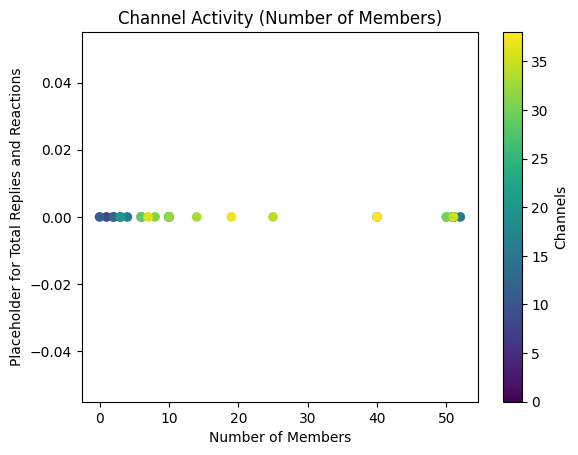

In [7]:
import matplotlib.pyplot as plt

def calculate_channel_activity(channels_data):
    channel_activity = {}
    for channel in channels_data:
        channel_name = channel['name']
        channel_id = channel['id']
        members_count = len(channel['members'])
        channel_activity[channel_name] = members_count

    return channel_activity

data_loader = SlackDataLoader(path='./../dataset/')
channels_data = data_loader.get_channels()

channel_activity_data = calculate_channel_activity(channels_data)
highest_activity_channel = max(channel_activity_data, key=channel_activity_data.get)

print(f"The channel with the highest activity is: {highest_activity_channel}")

x_values = list(channel_activity_data.values())  
y_values = [0] * len(x_values) 
channel_names = list(channel_activity_data.keys())

plt.scatter(x_values, y_values, c=range(len(channel_names)), cmap='viridis')
plt.xlabel('Number of Members')
plt.ylabel('Placeholder for Total Replies and Reactions')
plt.title('Channel Activity (Number of Members)')
plt.colorbar(label='Channels')
plt.show()
